In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
from environment.model_apps import apps
from environment.model_infra import Infra
from environment.constants import *

N_APPS = len(apps)
N_INFRA = Infra().getInfraSize()

obs_size = OBSERVATION_SPACE_SIZE
action_size = N_INFRA

INIT SERVICE DATA


In [3]:
data = {}
data["obs"] = [[] for _ in range(N_APPS)]
data["actions"] = [[] for _ in range(N_APPS)]
data["rewards"] = []
data["appLoad"] = [[] for _ in range(N_INFRA)]
with open("data/results.csv", "r") as f:
    for l in f:
        l = l.strip().split(",")
        l = list(map(float, l))
        for app in range(N_APPS):
            data["obs"][app].append(l[obs_size*app:obs_size*(app+1)])
        for app in range(N_APPS):
            data["actions"][app].append(l[obs_size*N_APPS + action_size*app:obs_size*N_APPS + action_size*(app+1)])
        k = obs_size*N_APPS + action_size*N_APPS
        for pm in range(N_INFRA):
            data["appLoad"][pm].append(l[k + pm * N_APPS:k + (pm+1) * N_APPS])
        
        data["rewards"].append(l[len(l)-N_APPS:len(l)])

data["obs"] = np.array(data["obs"])
data["actions"] = np.array(data["actions"])
data["rewards"] = np.array(data["rewards"])
data["appLoad"] = np.array(data["appLoad"])
        

[  0. 194.   0.]
[0. 0. 0.]
[0. 0. 0.]
[ 0.  0. 98.]
[281.   0.   0.]


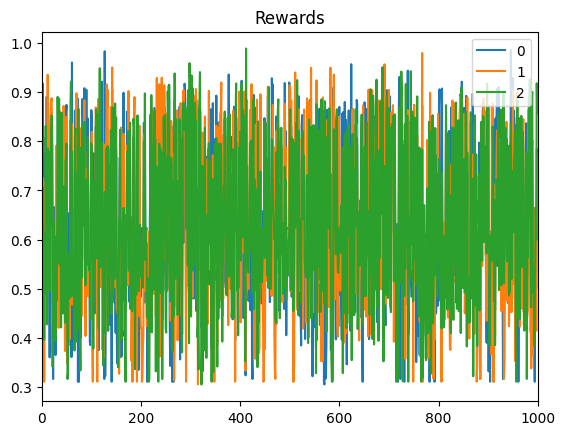

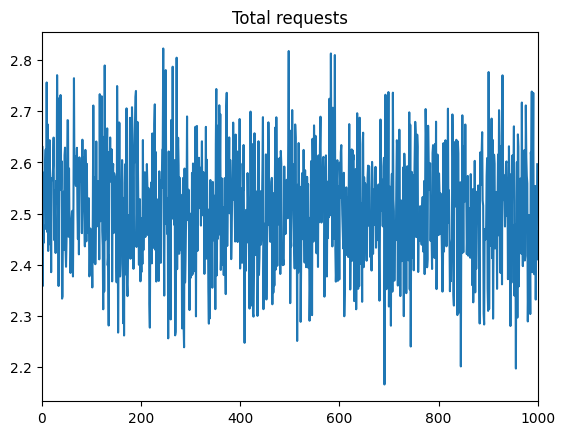

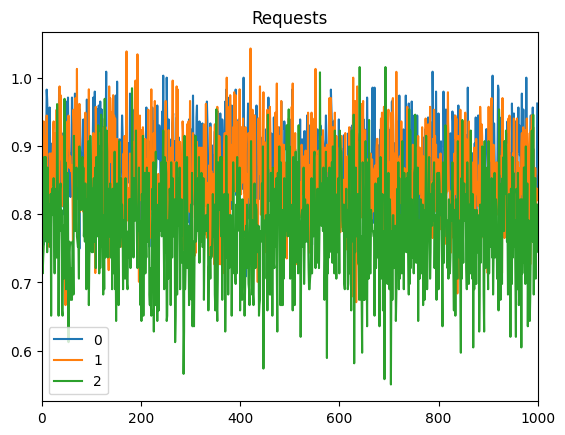

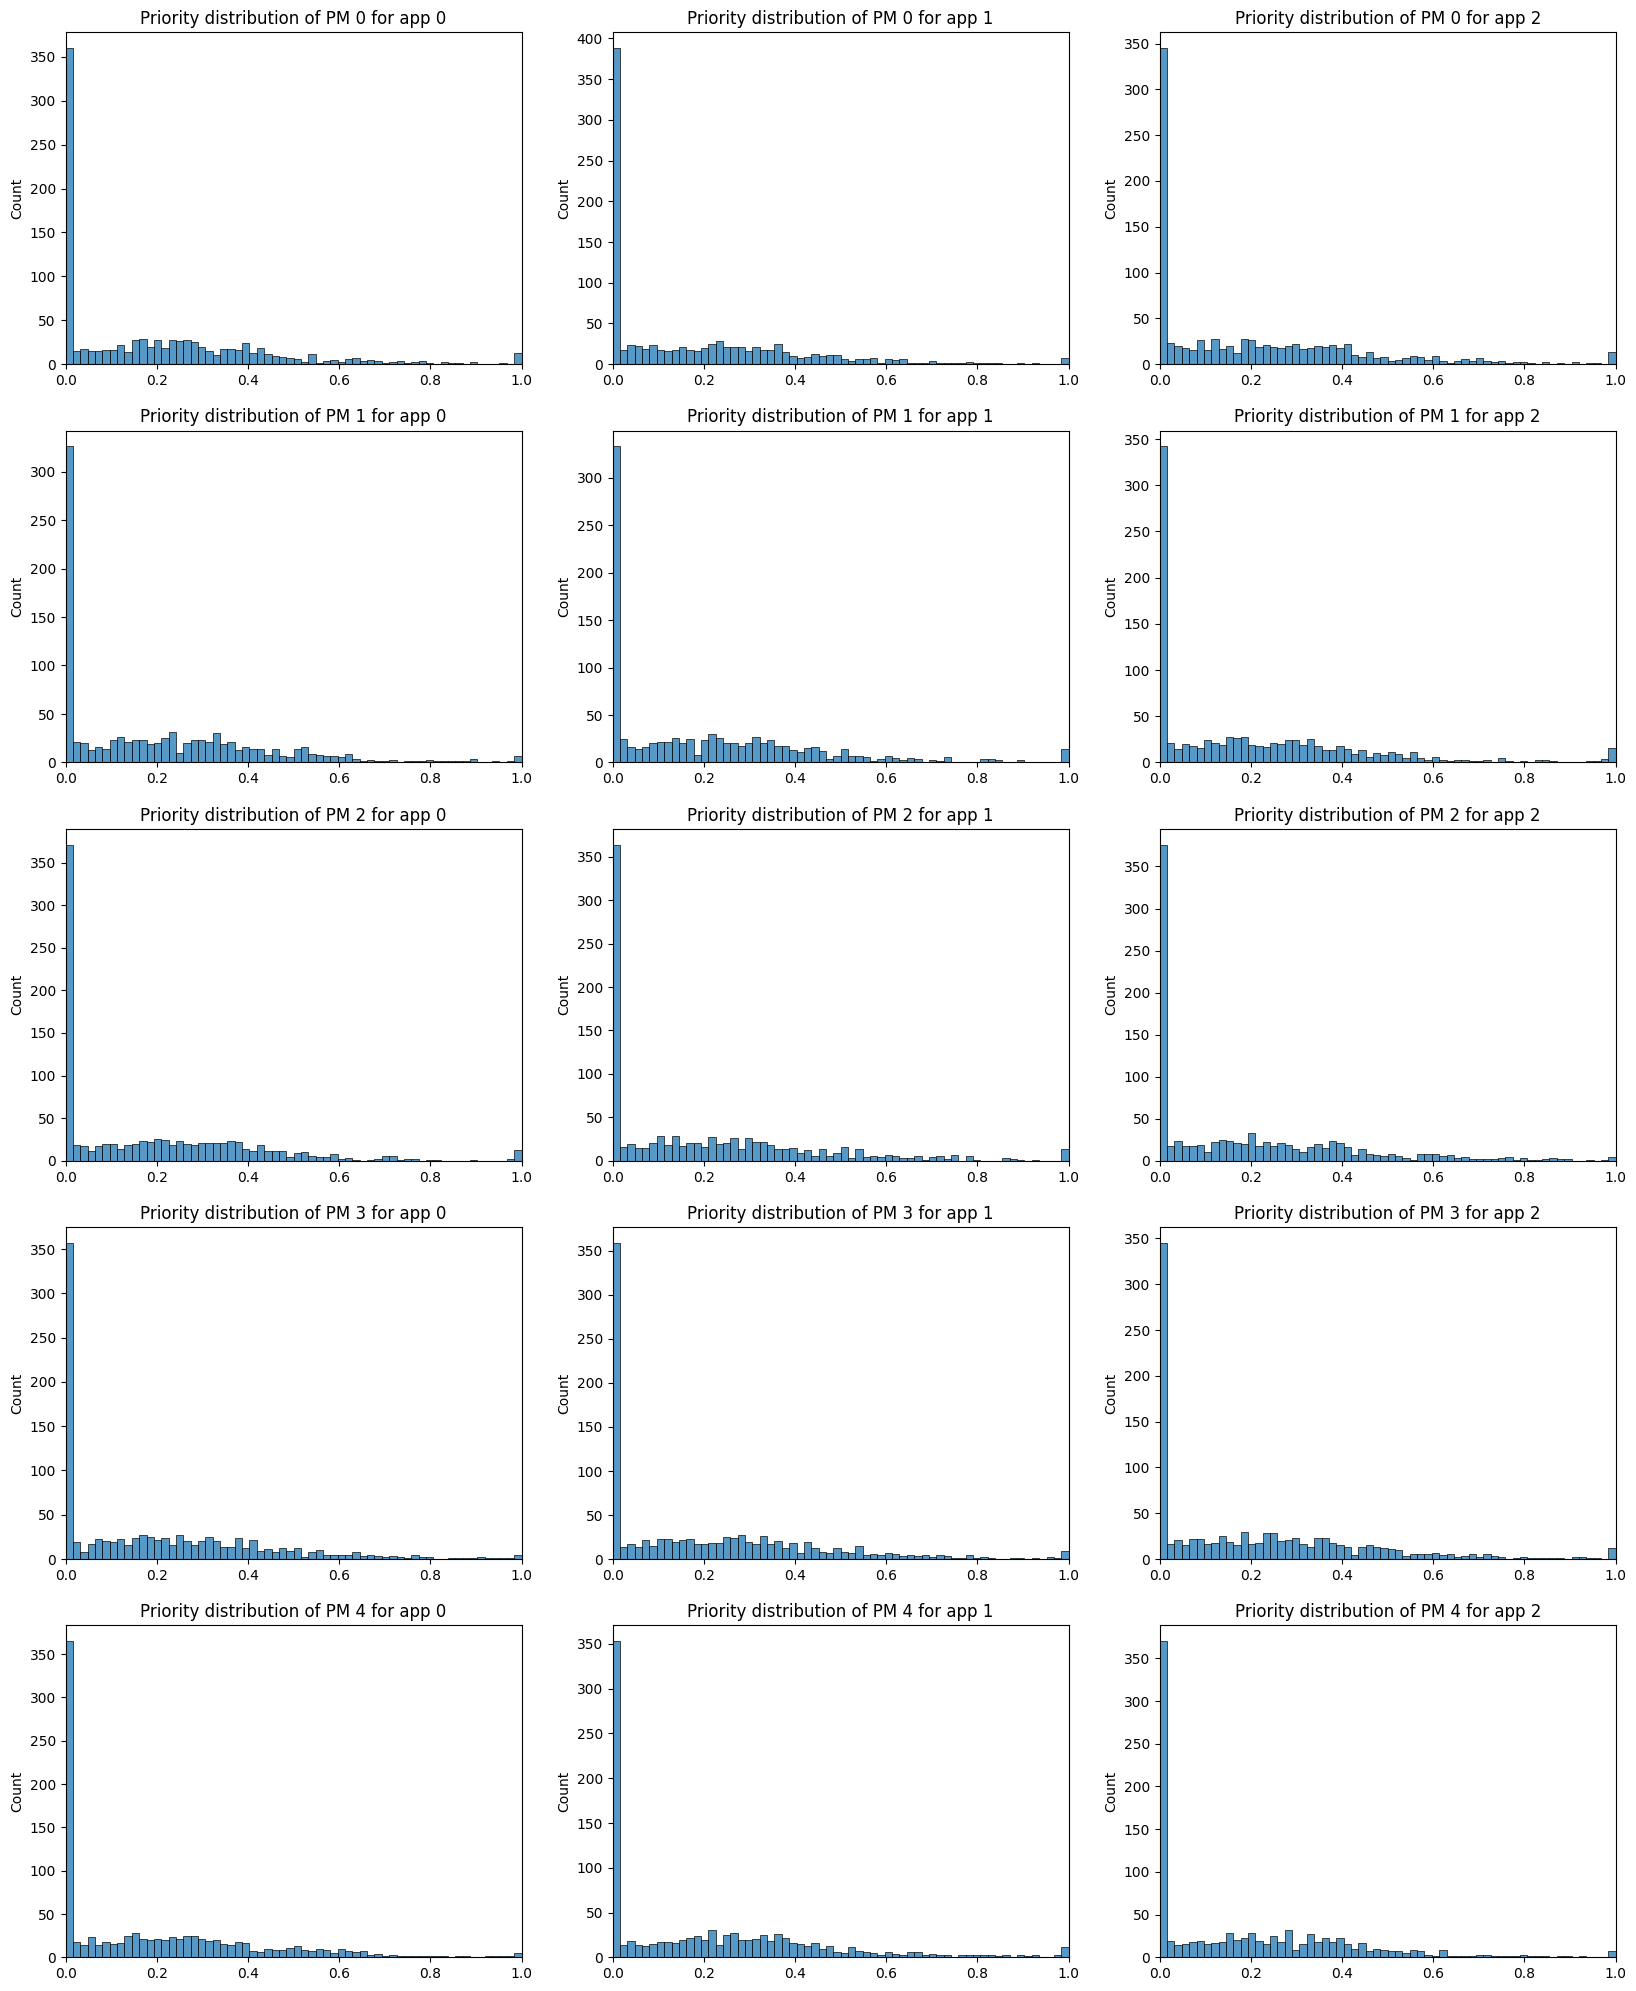

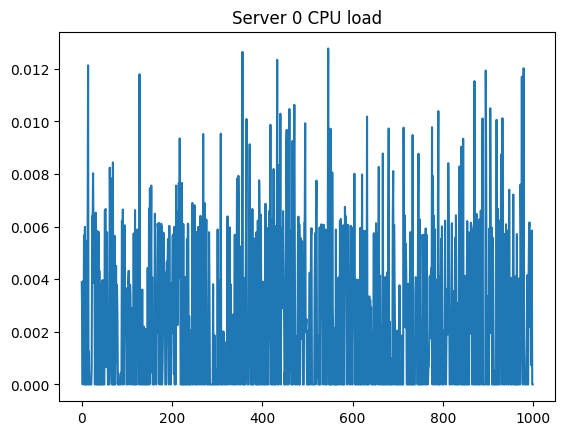

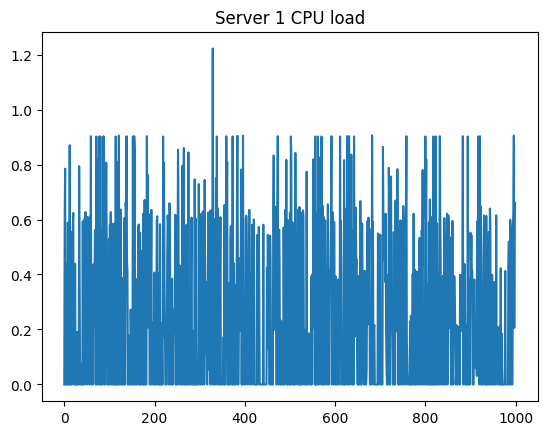

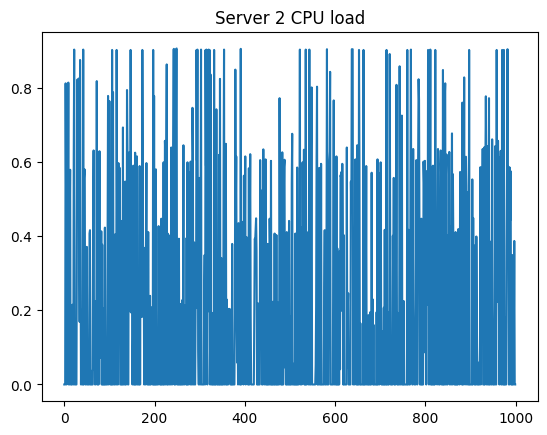

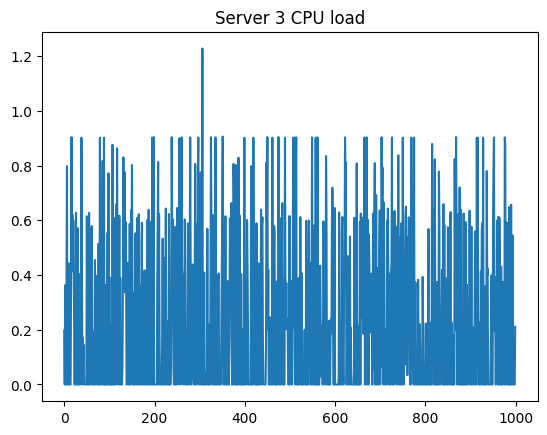

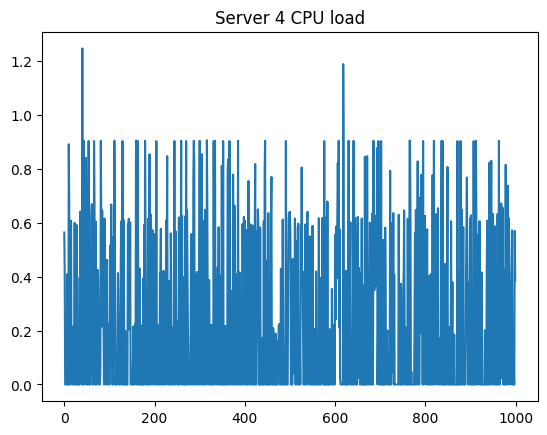

In [4]:
# rewards
plt.figure()
for app in range(N_APPS):
    plt.plot(data["rewards"][:1000,app], label=str(app))
plt.legend()
plt.xlim(0, 1000)
plt.title("Rewards")


# requests

plt.figure()
plt.plot(np.sum(data["obs"][:,:1000,-1], axis=0))
plt.xlim(0, 1000)
plt.title("Total requests")

plt.figure()
for app in range(N_APPS):
    plt.plot(data["obs"][app,:1000,-1], label=str(app))
plt.legend()
plt.xlim(0, 1000)
plt.title("Requests")


# actions

# Define the bin edges to span from 0 to 1 with regular intervals
bin_edges = np.linspace(0, 1, 63)

# Create the subplots grid
fig, axes = plt.subplots(5, 3, figsize=(20, 5 * N_INFRA))  # Adjust figsize as needed

for app in range(N_APPS):
    for i in range(N_INFRA):
        ax = axes[i][app]
        sns.histplot(data["actions"][app, :1000, i], bins=bin_edges, ax=ax)
        ax.set_xlim(0, 1)
        ax.set_title(f"Priority distribution of PM {i} for app {app}")
        #ax.set_ylim(0, 1)  # Optional, depending on your data


for s in range(N_INFRA):
    plt.figure()
    #sns.histplot(data["obs"][0,:1000,s], bins=bin_edges)
    #plt.xlim(0, 1)
    plt.plot(data["obs"][0,:1000,s])
    plt.title(f"Server {s} CPU load")


for s in range(N_INFRA):

    print(data["appLoad"][s,0,:])



plt.show()

